In [1]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

Define constants

In [2]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

Prepare data

Download data and save it

In [3]:
url = 'https://drive.google.com/file/d/1gjbSZV5NjjIVOqSP-yTCqXcGPX9PnYn5/view?usp=sharing'

In [4]:
!gdown --id 1gjbSZV5NjjIVOqSP-yTCqXcGPX9PnYn5

Downloading...
From: https://drive.google.com/uc?id=1gjbSZV5NjjIVOqSP-yTCqXcGPX9PnYn5
To: /content/MM17-WeiboRumorSet.zip
1.35GB [00:14, 91.5MB/s]


Unzip and save into folder train_extracted

In [5]:
import zipfile
with zipfile.ZipFile("MM17-WeiboRumorSet.zip","r") as zip_ref:
    zip_ref.extractall("./train_extracted")

Exract labels from image names and save image names with corresponding labels in dataframe

In [6]:
filenames1 = os.listdir("./train_extracted/MM17-WeiboRumorSet/rumor_images")
filenames01 = []
categories1 = []
for filename in filenames1:
    category = 1 # rumor
    categories1.append(1)
    s = "rumor_images/"+str(filename)
    filenames01.append(s)

df1 = pd.DataFrame({
    'filename': filenames01,
    'category': categories1
})

In [7]:
df1.head()

,filename,category
0,rumor_images/005Cp0Zcjw1eqxg1ipc63j30hs0hztah.jpg,1
1,rumor_images/720be4e5gw1eo6jz021qmj20c00e3mxq.jpg,1
2,rumor_images/6a77ebb7jw1ev20xu2excj20p018gn18.jpg,1
3,rumor_images/0062G6IYjw1er1zfiinvhj30wo1407az.jpg,1
4,rumor_images/5d6ed51fjw1eb8s33w2yoj20c808q0u1.jpg,1


In [8]:
len(df1) # number of rumor images

7954

In [9]:
filenames2 = os.listdir("./train_extracted/MM17-WeiboRumorSet/nonrumor_images")
filenames02 = []
categories2 = []
for filename in filenames2:
    category2 = 0 # rumor
    categories2.append(0)
    s = "nonrumor_images/"+str(filename)
    filenames02.append(s)

df2 = pd.DataFrame({
    'filename': filenames02,
    'category': categories2
})

In [10]:
df2.head()

,filename,category
0,nonrumor_images/61ff32dejw1ezpn9odko9j20c80f7m...,0
1,nonrumor_images/66eeadffjw1eyz8i8z3e2j20hs0dcg...,0
2,nonrumor_images/620beb06gw1eyl2duidwcj21e06k4h...,0
3,nonrumor_images/61e6c012jw1ez1r01nnw5j20c81367...,0
4,nonrumor_images/61b8c41ejw1evetlsoyaej20ic0c8t...,0


In [11]:
len(df2) # number of non rumor images

5318

In [12]:
df = df1.append(df2, ignore_index=True).reset_index(drop = True)

In [13]:
df.head()

,filename,category
0,rumor_images/005Cp0Zcjw1eqxg1ipc63j30hs0hztah.jpg,1
1,rumor_images/720be4e5gw1eo6jz021qmj20c00e3mxq.jpg,1
2,rumor_images/6a77ebb7jw1ev20xu2excj20p018gn18.jpg,1
3,rumor_images/0062G6IYjw1er1zfiinvhj30wo1407az.jpg,1
4,rumor_images/5d6ed51fjw1eb8s33w2yoj20c808q0u1.jpg,1


In [14]:
len(df) # combined

13272

In [15]:
df.describe()

,category
count,13272.000000
mean,0.599307
std,0.490057
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [16]:
df.tail()

,filename,category
13267,nonrumor_images/66eeadffjw1eynry0u92vj20m80es7...,0
13268,nonrumor_images/593bbc68gw1ezuivqza5aj20c80cbm...,0
13269,nonrumor_images/6298156bgw1ey7b8tsjeyj20c6099w...,0
13270,nonrumor_images/70e11e0fjw1eww3qmvoiaj20hi0atg...,0
13271,nonrumor_images/0065yqVkjw1ezwqa63fg9j30fa0bgj...,0


Total count

In [17]:
label_counts = df.groupby('category').size()
print(label_counts)

category
0    5318
1    7954
dtype: int64


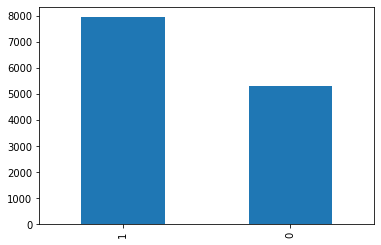

In [18]:
df['category'].value_counts().plot.bar()

Sample image

Shuffle df

In [19]:
# shuffle the DataFrame rows 
df = df.sample(frac = 1).reset_index(drop=True) 

In [20]:
df.head()

,filename,category
0,rumor_images/8cfbe3ffjw1eqxgw7iiyzj20c809o74m.jpg,1
1,rumor_images/5fce79degw1ep55x5lkkwj20hs0nq778.jpg,1
2,nonrumor_images/6541fc49gw1ew1q86s7pdj20go0b4j...,0
3,nonrumor_images/63136032gw1ev9azul72hj20sg11xa...,0
4,rumor_images/50360241jw1ep6urpl68sj20hs0ch74n.jpg,1


In [21]:
df.tail()

,filename,category
13267,nonrumor_images/70e11e0fjw1ew2yci9n0nj20go0m87...,0
13268,nonrumor_images/644471aegw1eyotdtjiwpj20go0bd0...,0
13269,nonrumor_images/63207a53jw1eyvy1vl1zsj20c80c8d...,0
13270,rumor_images/a72e4501jw1ev0rmg2y2ej20r80kf0wi.jpg,1
13271,rumor_images/0066YqL4jw1es7kgc5r1gj30f00qota5.jpg,1


Make a combined list with rumor and non rumor image paths last part

In [22]:
filenames = []
categories = []
for i in range(0, len(df)):
  filenames.append(str(df['filename'][i]))
  categories.append((df['category'][i]))
print(len(filenames))
print(len(categories))

13272
13272


In [23]:
print(filenames[0])
print(categories[0])
print(filenames[-1])
print(categories[-1])

rumor_images/8cfbe3ffjw1eqxgw7iiyzj20c809o74m.jpg
1
rumor_images/0066YqL4jw1es7kgc5r1gj30f00qota5.jpg
1


nonrumor_images/707e96d5gw1eythez54kkj20cg0gmaau.jpg


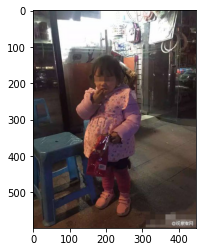

In [24]:
sample = random.choice(filenames)
print(sample)
image = load_img("./train_extracted/MM17-WeiboRumorSet/"+sample)
plt.imshow(image)

Build Model


Input Layer: It represent input image data. It will reshape image into single diminsion array. Example your image is 64x64 = 4096, it will convert to (4096,1) array.

Conv Layer: This layer will extract features from image.

Pooling Layer: This layerreduce the spatial volume of input image after convolution.

Fully Connected Layer: It connect the network from a layer to another layer

Output Layer: It is the predicted values layer.

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

Callbacks

In [26]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

Early Stop

To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased

In [27]:
earlystop = EarlyStopping(patience=10)

Learning Rate Reduction

We will reduce the learning rate when then accuracy not increase for 2 steps

In [28]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [29]:
callbacks = [earlystop, learning_rate_reduction]

Prepare data

Because we will use image genaretor with class_mode="categorical". We need to convert column category into string. Then imagenerator will convert it one-hot encoding which is good for our classification.

So we will convert 1 to rumor and 0 to nonrumor

In [30]:
df["category"] = df["category"].replace({0: 'nonrumor', 1: 'rumor'}) 

In [31]:
df.head()

,filename,category
0,rumor_images/8cfbe3ffjw1eqxgw7iiyzj20c809o74m.jpg,rumor
1,rumor_images/5fce79degw1ep55x5lkkwj20hs0nq778.jpg,rumor
2,nonrumor_images/6541fc49gw1ew1q86s7pdj20go0b4j...,nonrumor
3,nonrumor_images/63136032gw1ev9azul72hj20sg11xa...,nonrumor
4,rumor_images/50360241jw1ep6urpl68sj20hs0ch74n.jpg,rumor


Divide into 80% train and 20% test, Note that we have shuffled earlier

In [32]:
mid = int(len(df)*0.8)
df_train = df[:mid]
df_test = df[mid:]
print(len(df_train))
print(len(df_test))

10617
2655


In [33]:
train_df, validate_df = train_test_split(df_train, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

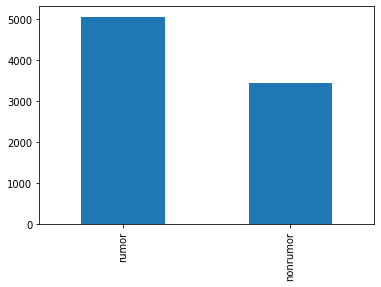

In [34]:
train_df['category'].value_counts().plot.bar()

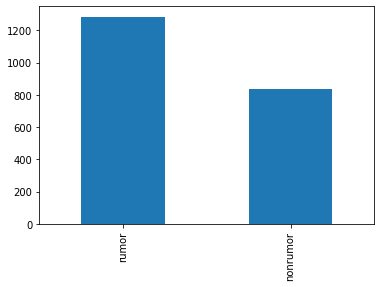

In [35]:
validate_df['category'].value_counts().plot.bar()

In [36]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=32

Traning Generator

In [37]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "./train_extracted/MM17-WeiboRumorSet/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 8478 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 15 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Validation Generator

In [38]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "./train_extracted/MM17-WeiboRumorSet/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 2119 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 5 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


See how our generator work

In [39]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "./train_extracted/MM17-WeiboRumorSet/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


Seems great

Fit Model

In [40]:
FAST_RUN = False

In [41]:
epochs=3 if FAST_RUN else 20
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
265/265 [==============================] - 97s 367ms/step - loss: 0.9712 - accuracy: 0.5436 - val_loss: 0.7096 - val_accuracy: 0.5005
Epoch 2/20
265/265 [==============================] - 96s 364ms/step - loss: 0.7445 - accuracy: 0.5787 - val_loss: 0.9329 - val_accuracy: 0.4067
Epoch 3/20
265/265 [==============================] - 99s 373ms/step - loss: 0.6797 - accuracy: 0.5996 - val_loss: 0.6910 - val_accuracy: 0.6075
Epoch 4/20
265/265 [==============================] - 99s 374ms/step - loss: 0.6599 - accuracy: 0.6111 - val_loss: 0.6229 - val_accuracy: 0.6307
Epoch 5/20
265/265 [==============================] - 101s 379ms/step - loss: 0.6529 - accuracy: 0.6045 - val_loss: 0.7153 - val_accuracy: 0.5384
Epoch 6/20
265/265 [==============================] - 102s 385ms/step - loss: 0.6420 - accuracy: 0.6262 - val_loss: 0.5841 - val_accuracy: 0.6752
Epoch 7/20
265/265 [==============================] 

Save Model

In [42]:
model.save_weights("model.h5")

In [43]:
model.save_weights("4_Conv_layers_1_COMP5331_Initial_Full_Classifier_Ayush_10102020Rumor_Nonrumor_50epochs_model.h5")

In [44]:
# saving the dataframe 
df.to_csv('4_Conv_layers_1_COMP5331_Initial_Full_Classifier_Ayush_10102020df_5331.csv') 

In [45]:
# saving the dataframe 
df_train.to_csv('4_Conv_layers_1_COMP5331_Initial_Full_Classifier_Ayush_10102020df_train_5331.csv')
# saving the dataframe 
df_test.to_csv('4_Conv_layers_1_COMP5331_Initial_Full_Classifier_Ayush_10102020df_test_5331.csv') 

In [46]:
from google.colab import files
files.download('4_Conv_layers_1_COMP5331_Initial_Full_Classifier_Ayush_10102020Rumor_Nonrumor_50epochs_model.h5') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
files.download('4_Conv_layers_1_COMP5331_Initial_Full_Classifier_Ayush_10102020df_5331.csv') 
files.download('4_Conv_layers_1_COMP5331_Initial_Full_Classifier_Ayush_10102020df_train_5331.csv') 
files.download('4_Conv_layers_1_COMP5331_Initial_Full_Classifier_Ayush_10102020df_test_5331.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [48]:
model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


Visualize Training

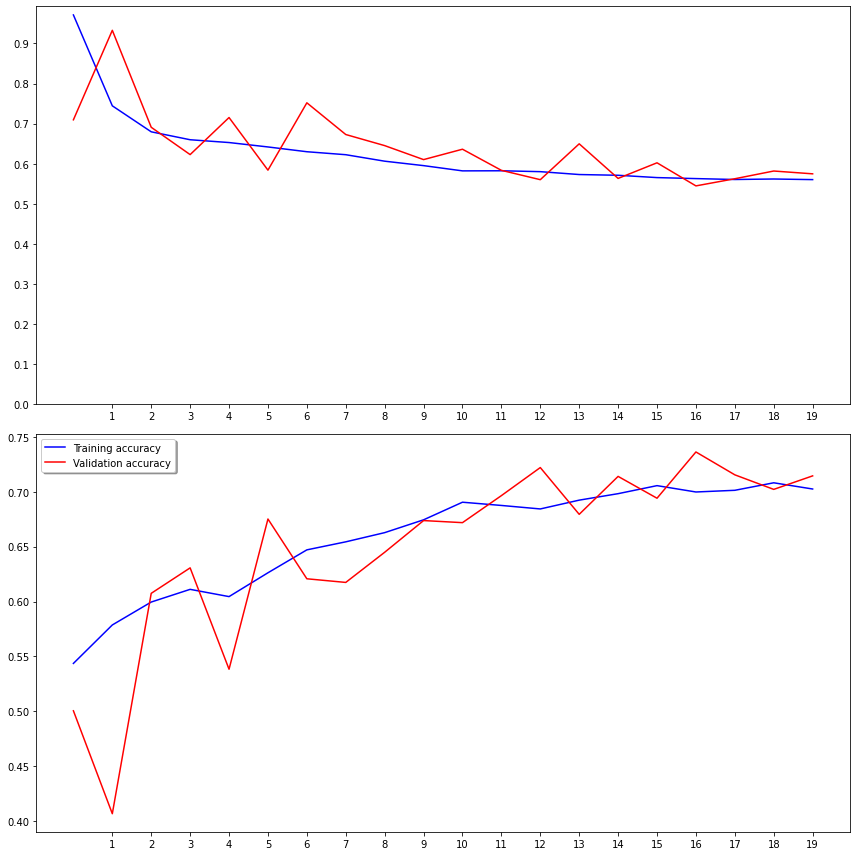

In [49]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

Prepare Testing Data

In [50]:
df_test.head()


,filename,category
10617,nonrumor_images/6541fc49gw1exeujso3e7j20go09d3...,nonrumor
10618,nonrumor_images/61e6c012jw1eyd28xsgq9j20e40m87...,nonrumor
10619,nonrumor_images/6a918093jw1ewv6jx9kmdj20dw0ag7...,nonrumor
10620,rumor_images/6fbe59d9jw1ev197g8grlj20cq0hsgmr.jpg,rumor
10621,nonrumor_images/4e5b54d8gw1eyvpum5a17j20m80ett...,nonrumor


In [51]:
df_test = df_test.reset_index(drop = True)

In [52]:
test_filenames = []
test_categories = []
for i in range(0,len(df_test)):
  test_filenames.append(df_test['filename'][i])
  test_categories.append(df_test['category'][i])
print(len(test_filenames))

2655


In [53]:
test_df = df_test
nb_samples = test_df.shape[0]

Create Testing Generator

In [54]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "./train_extracted/MM17-WeiboRumorSet/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False,
    validate_filenames=False
)

Found 2655 non-validated image filenames.


Predict

In [55]:
predict = model.predict(test_generator, steps=np.ceil(nb_samples/batch_size))

In [56]:
print(predict)

[[0.9393475  0.06065245]
 [0.955152   0.04484806]
 [0.99205935 0.00794065]
 ...
 [0.95522684 0.04477322]
 [0.3016169  0.69838315]
 [0.039956   0.96004397]]


For categoral classication the prediction will come with probability of each category. So we will pick the category that have the highest probability with numpy average max

In [57]:
test_df['category_predicted'] = np.argmax(predict, axis=-1)

We will convert the predict category back into our generator classes by using train_generator.class_indices. It is the classes that image generator map while converting data into computer vision

In [58]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category_predicted'] = test_df['category_predicted'].replace(label_map)

From our prepare data part. We map data with {1: 'rumor', 0: 'nonrumor'}. Now we will map the result back to rumor is 1 and nonrumor is 0

In [59]:
test_df['category_predicted'] = test_df['category_predicted'].replace({ 'rumor': 1, 'nonrumor': 0 })
test_df['category'] = test_df['category'].replace({ 'rumor': 1, 'nonrumor': 0 })

Virtaulize Result

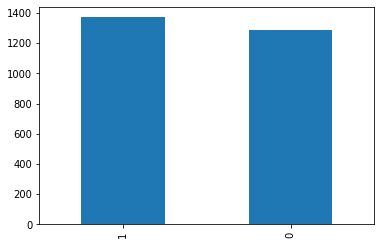

In [60]:
test_df['category_predicted'].value_counts().plot.bar()

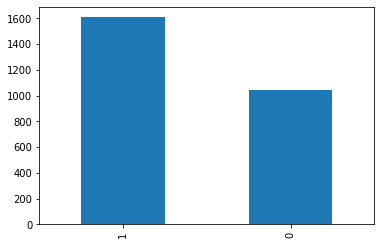

In [61]:
test_df['category'].value_counts().plot.bar()

In [62]:
y_pred = test_df['category_predicted']
y_true = test_df['category']

In [63]:
from sklearn.metrics import accuracy_score # normal accuracy
from sklearn.metrics import balanced_accuracy_score # used in case of imbalanced data sets, average of recall, from 0 to 1
from sklearn.metrics import confusion_matrix # division of performance on the multilabels
from sklearn.metrics import cohen_kappa_score # compares model against random prediction, from -1 to 1
from sklearn.metrics import classification_report # for multilabel classification, gives precision, recall, f score, support, more
target_names = ['class 0', 'class 1']

def print_metrics(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Balanced Accuracy:" , balanced_accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Cohen Kappa Score:", cohen_kappa_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred, target_names=target_names))
    
print('CNN Only')
print_metrics(y_true, y_pred)

CNN Only
Accuracy: 0.6806026365348399
Balanced Accuracy: 0.6854681541567688
Confusion Matrix:
 [[ 741  305]
 [ 543 1066]]
Cohen Kappa Score: 0.3567354719484621
Classification Report:
               precision    recall  f1-score   support

     class 0       0.58      0.71      0.64      1046
     class 1       0.78      0.66      0.72      1609

    accuracy                           0.68      2655
   macro avg       0.68      0.69      0.68      2655
weighted avg       0.70      0.68      0.68      2655



See predicted result with images

In [64]:
# saving the dataframe of our results
test_df.to_csv('4_Conv_layers_1_COMP5331_Initial_Full_Classifier_Ayush_10102020test_df_5331.csv') 
files.download('4_Conv_layers_1_COMP5331_Initial_Full_Classifier_Ayush_10102020test_df_5331.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>